In [317]:
import numpy as np
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

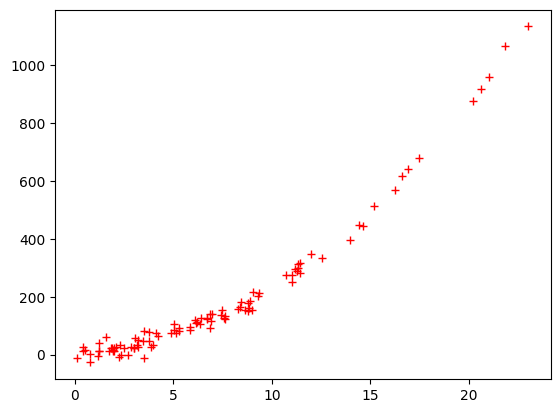

In [318]:
import matplotlib.pyplot as plt
plt.plot(x_1,y,'+',color='red')

In [319]:
import pandas as pd
data=pd.DataFrame({'feature':x_1.reshape(-1),'target':y.reshape(-1)})
data

,feature,target
0,16.243454,569.487362
1,6.117564,119.692028
2,5.281718,81.708065
3,10.729686,276.312962
4,8.654076,155.850065
...,...,...
95,0.773401,-27.032268
96,3.438537,48.009066
97,0.435969,12.093687
98,6.200008,113.699268


In [320]:
x=data[['feature']].values
y=data[['target']].values
print(x.shape)
y.shape

(100, 1)


(100, 1)

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
pf=PolynomialFeatures(degree=10)
p_x_train=pf.fit_transform(x_train)
p_x_test=pf.fit_transform(x_test)
lr=LinearRegression()
lr.fit(p_x_train,y_train)

LinearRegression()

In [322]:
lr.coef_

array([[ 0.00000000e+00,  1.64861825e+02, -1.75817706e+02,
         8.81395749e+01, -2.33472026e+01,  3.64117133e+00,
        -3.51142212e-01,  2.11905698e-02, -7.79064035e-04,
         1.59526273e-05, -1.39444866e-07]])

In [323]:
lr.intercept_
p_x_test

array([[1.00000000e+00, 2.22328143e+00, 4.94298030e+00, 1.09896363e+01,
        2.44330542e+01, 5.43215557e+01, 1.20772106e+02, 2.68510380e+02,
        5.96974140e+02, 1.32724152e+03, 2.95083141e+03],
       [1.00000000e+00, 1.98299720e+00, 3.93227790e+00, 7.79769607e+00,
        1.54628095e+01, 3.06627079e+01, 6.08040640e+01, 1.20574289e+02,
        2.39098477e+02, 4.74131611e+02, 9.40201658e+02],
       [1.00000000e+00, 8.45205641e+00, 7.14372576e+01, 6.03791732e+02,
        5.10328178e+03, 4.31332255e+04, 3.64564455e+05, 3.08131934e+06,
        2.60434849e+07, 2.20121004e+08, 1.86047514e+09],
       [1.00000000e+00, 2.00758069e+00, 4.03038022e+00, 8.09131351e+00,
        1.62439648e+01, 3.26110700e+01, 6.54693543e+01, 1.31435011e+02,
        2.63866391e+02, 5.29733071e+02, 1.06348188e+03],
       [1.00000000e+00, 6.38730407e+00, 4.07976533e+01, 2.60587017e+02,
        1.66444852e+03, 1.06313388e+04, 6.79055936e+04, 4.33733675e+05,
        2.77038887e+06, 1.76953161e+07, 1.13025365e+

In [324]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
pred=lr.predict(p_x_test)
r2_score(y_test,pred)
x_test=x_test.reshape(-1)
y_test=y_test.reshape(-1)

(30,)
(165, 1)


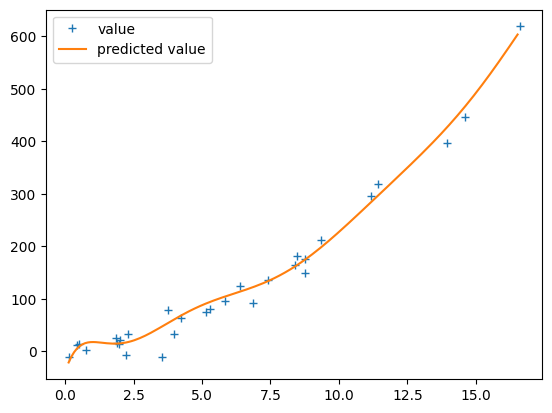

In [325]:
X_grid = np.arange(min(x_test),max(x_test),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.plot(x_test,y_test,'+',label='value')
plt.plot(X_grid,lr.predict(pf.fit_transform(X_grid)),label='predicted value')
plt.legend()
print(x_test.shape)
print(X_grid.shape)